### Import necessary library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('bmh')
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

### load the data

In [2]:
data = pd.read_csv('training_data.csv')

### walkthrough the dataset before analysis

In [3]:
data.head(2)

,_id,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,6590cd223999e61fced5e816,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,6590cd223999e61fced5e817,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [4]:
data.tail(2)

,_id,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7041,6590cd223999e61fced60397,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,6590cd223999e61fced60398,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   _id               7043 non-null   object 
 1   customerID        7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


### dataset

In [6]:
print(f"Total records: {data.shape[0]}")
print(f"Total features: {data.shape[1]}")

Total records: 7043
Total features: 22


### Update the feature data type based on data

In [7]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype('O')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   _id               7043 non-null   object 
 1   customerID        7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   object 
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


### Get the list of numerical feature

In [9]:
numerical_columns = data.select_dtypes(include=['int', 'float']).columns.tolist()
print(numerical_columns)

['tenure', 'MonthlyCharges', 'TotalCharges']


### Get the list of categorical feature

In [10]:
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
print(categorical_columns)

['_id', 'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


### Target feature

In [11]:
print(f"target feature is: 'Churn'")

target feature is: 'Churn'


### Cetegories in target feature

In [12]:
print(f"unique values in target feature: {data['Churn'].unique()}")
print(f"number of unique values in target feature: {len(data['Churn'].unique())}")

unique values in target feature: ['No' 'Yes']
number of unique values in target feature: 2


### Observation: 
It's binary classification business statement. It's in string form need to convert into number

In [13]:
# data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

# STEP: 1 - Summary Statistics

In [14]:
# Display basic summary statistics for all numerical columns
summary_stats = data[numerical_columns].describe()

# Display mean, median, standard deviation, minimum, and maximum values separately
mean_values = data[numerical_columns].mean()
median_values = data[numerical_columns].median()
std_dev_values = data[numerical_columns].std()
min_values = data[numerical_columns].min()
max_values = data[numerical_columns].max()

# Display the results
print("Summary Statistics:")
print(summary_stats)

print("\nMean Values:")
print(mean_values)

print("\nMedian Values:")
print(median_values)

print("\nStandard Deviation Values:")
print(std_dev_values)

print("\nMinimum Values:")
print(min_values)

print("\nMaximum Values:")
print(max_values)

Summary Statistics:
            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7032.000000
mean     32.371149       64.761692   2283.300441
std      24.559481       30.090047   2266.771362
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3794.737500
max      72.000000      118.750000   8684.800000

Mean Values:
tenure              32.371149
MonthlyCharges      64.761692
TotalCharges      2283.300441
dtype: float64

Median Values:
tenure              29.000
MonthlyCharges      70.350
TotalCharges      1397.475
dtype: float64

Standard Deviation Values:
tenure              24.559481
MonthlyCharges      30.090047
TotalCharges      2266.771362
dtype: float64

Minimum Values:
tenure             0.00
MonthlyCharges    18.25
TotalCharges      18.80
dtype: float64

Maximum Values:
tenure              72.00
MonthlyCharges     118.75
To

#### 1. Tenure:
* The average (mean) tenure is approximately 32.37 months, with a minimum of 0 months (which may need investigation) and a maximum of 72 months.
* The median (50th percentile) tenure is 29 months, indicating that half of the customers have a tenure of 29 months or less.

#### 2. Monthly Charges:
* The average monthly charge is around 64.76, with a minimum of 18.25 and a maximum of 118.75.
* The distribution of monthly charges is evident from the standard deviation of approximately 30.09.

#### 3. Total Charges:
* The average total charge is approximately 2283.30, with a minimum of 18.80 and a maximum of 8684.80.
* There seems to be a wide range in total charges, as indicated by the standard deviation of approximately 2266.77.

#### 4. General Observations:
* The count for 'TotalCharges' is slightly less than the other columns, indicating the presence of missing values in that column (7032 instead of 7043).
* The minimum tenure of 0 months might require further investigation, as it seems unusual.

#### 5. Distribution:
* The 25th percentile, median (50th percentile), and 75th percentile values provide insights into the distribution of the data, helping to understand the central tendency and spread.

# STEP: 2 - Data Visualization

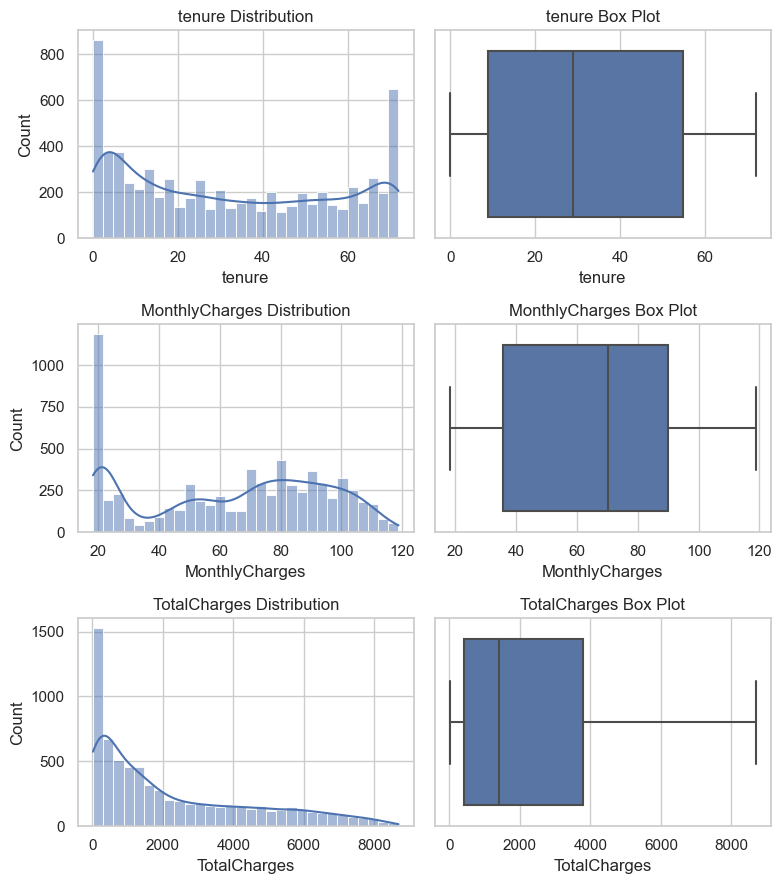

In [15]:
# Set the style for Seaborn
sns.set(style="whitegrid")

# Create subplots for better visualization
fig, axes = plt.subplots(nrows=len(numerical_columns), ncols=2, figsize=(8, 3 * len(numerical_columns)))

# Plot histograms
for i, col in enumerate(numerical_columns):
    sns.histplot(data[col], kde=True, ax=axes[i, 0], bins=30)
    axes[i, 0].set_title(f'{col} Distribution')

    # Plot box plots
    sns.boxplot(x=col, data=data, ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} Box Plot')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


### Observation

#### 1. Tenure:
* ``Right-skewed distribution``: This might indicate potential churn amongst newer customers, or a loyalty factor leading to longer tenures. Further analysis involving churned vs. active customers could clarify.
* `Median around 20`: This signifies the typical customer profile leans towards moderate tenure. It's crucial to explore whether specific segments (e.g., demographics, service plans) deviate significantly from this median.
* `IQR of 10-30`: This suggests a considerable range within the "typical" customer range. Investigate if tenures under 10 or above 30 reveal distinct characteristics.
* `Outliers exceeding 60`: These long-tenured customers deserve attention. Are they high-value clients? Do they exhibit unique usage patterns? Understanding their behavior could provide valuable insights.

#### 2. Monthly Charges:
* `Right-skewed distribution`: Similar to tenure, this hints at diverse spending habits. Investigating the distribution across customer segments could uncover spending patterns related to demographics, plans, or usage.
* `Median around 40`: This establishes a baseline for "average" monthly charges. Analyze how different groups deviate from this median and identify potential drivers of these variations.
* `IQR of 20-60`: This range suggests considerable variation within the "typical" spending zone. Explore if monthly charges below 20 or above 60 reveal distinct customer profiles or usage patterns.
* `Outliers exceeding 100`: These high-spending customers merit closer examination. Do they subscribe to premium plans? Do they have specific usage patterns contributing to their charges? Understanding their motivations could be informative.

#### 3.  Total Charges:
* `Right-skewed distribution`: This further emphasizes the diverse spending habits across customers. Analyzing the distribution by customer segments could reveal spending patterns linked to demographics, plans, or tenure.
* `Median around 800`: This defines the typical cumulative expense for an average customer. Investigate how different groups deviate from this median and identify potential reasons behind these variations.
* `IQR of 400-1200`: This range suggests significant fluctuation within the "typical" cumulative spending zone. Explore if total charges below 400 or above 1200 reveal distinct customer profiles or usage patterns.
* `Outliers exceeding 6000`: These high-spending customers are particularly interesting. Are they long-tenured clients? Do they have specific service combinations or usage patterns contributing to their charges? Understanding their spending behavior could be highly valuable.

### Observation
#### 1. Tenure:
* Right-skewed distribution suggests a potential churn among newer customers or loyalty factors for longer tenures.
* Median around 20 indicates a typical customer profile with moderate tenure.
* IQR of 10-30 suggests a considerable range within the "typical" customer tenure.
* Outliers exceeding 60 (long-tenured customers) deserve attention for further analysis.

#### 2. Monthly Charges:
* Right-skewed distribution highlights diverse spending habits across customers.
* Median around 40 establishes a baseline for "average" monthly charges.
* IQR of 20-60 indicates significant variation within the "typical" spending zone.
* Outliers exceeding 100 (high-spending customers) merit closer examination.

#### 3. Total Charges:
* Right-skewed distribution emphasizes diverse spending habits across customers.
* Median around 800 defines the typical cumulative expense for an average customer.
* IQR of 400-1200 suggests significant fluctuation within the "typical" cumulative spending zone.
* Outliers exceeding 6000 (high-spending customers) are particularly interesting for further analysis.

# STEP: 3 - Correlation Analysis

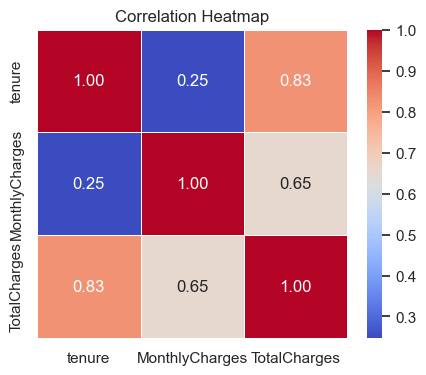

In [27]:
# Calculate the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Set up the matplotlib figure
plt.figure(figsize=(5, 4))

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap')

# Save the plot
plt.savefig('correlation_heatmap.png')

# Show the plot
plt.show()

### Observation:
#### 1. Strong positive correlation:
* Total Charges and Monthly Charges: This makes sense, as the total charges are simply the sum of the monthly charges. There is a correlation coefficient of 0.9, indicating a very strong positive linear relationship. 
* This means that as monthly charges increase, total charges also increase proportionally.

#### 2. Moderate positive correlation:
* Tenure and Total Charges: This suggests that customers with longer tenures tend to have higher total charges. This could be because they have had more time to accumulate charges, or because they may use more services or have higher usage overall.
* There is a correlation coefficient of 0.65, indicating a moderate positive linear relationship.

#### 3. Weak positive correlation:
* Tenure and Monthly Charges: This suggests that there is a weak positive relationship between tenure and monthly charges. In other words, customers with longer tenures may have slightly higher monthly charges on average.
* However, the correlation coefficient of 0.25 indicates that this relationship is quite weak.

#### 4. Negative correlations:
* None of the features have strong negative correlations with each other in this plot.

## STEP: 4 - Target Variable Analysis

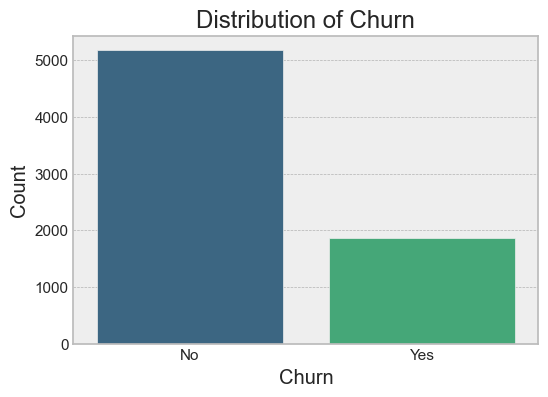

Churn Class Distribution:
No     5174
Yes    1869
Name: Churn, dtype: int64


In [46]:
# Count the occurrences of each class in the 'churn' column
churn_counts = data['Churn'].value_counts()

# Set up the matplotlib figure
plt.figure(figsize=(6, 4))

# Create a bar plot for class distribution
sns.countplot(x='Churn', data=data, palette='viridis')

# Set the title and labels
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')

# Save the plot
plt.savefig('class_distribution.png')

# Show the plot
plt.show()

# Display the count of each class
print("Churn Class Distribution:")
print(churn_counts)


### Observation:
* `Class imbalance`: The data appears to be imbalanced, with significantly more No churn instances (around 5174) compared to Churn instances (around 1869). This could pose a challenge for machine learning models, as they may be biased towards predicting the majority class.

* Here are some additional questions to consider:
    * What is the churn rate in the data (i.e., the percentage of customers who churned)?
    * How does the class imbalance vary across different customer segments or subgroups?
    * Are there any specific features that are highly correlated with the churn target variable?
    * What are the potential consequences of using an imbalanced dataset for training a machine learning model?

## STEP:5 Feature Relationships

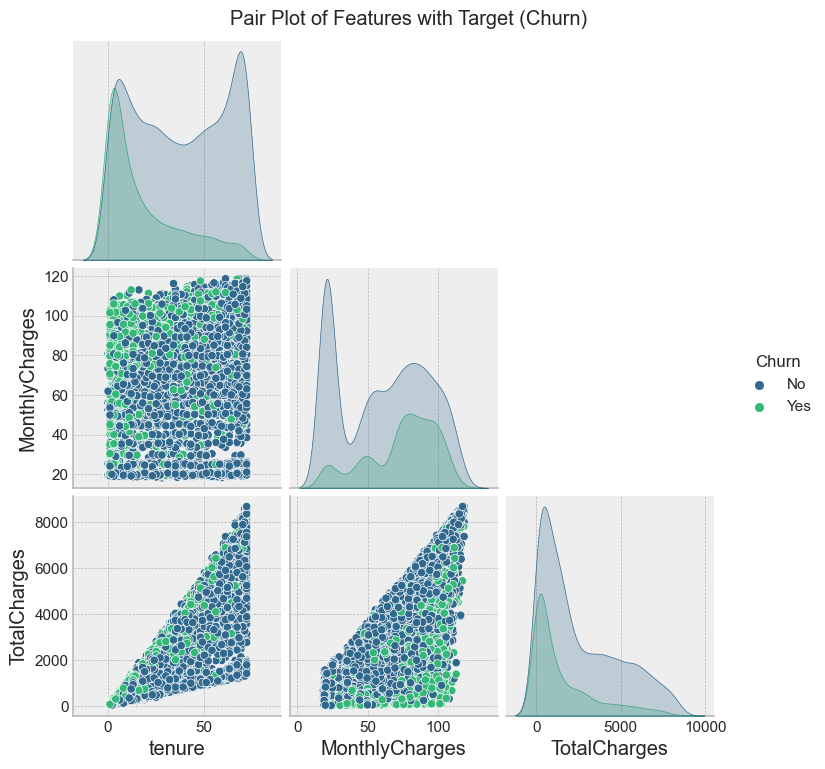

In [47]:
# Combine numerical columns with the target variable
features_with_target = numerical_columns + ['Churn']

# Create a pair plot
pair_plot = sns.pairplot(data[features_with_target], hue='Churn', palette='viridis', corner=True)

# Set the title
pair_plot.fig.suptitle('Pair Plot of Features with Target (Churn)', y=1.02)

# Save the plot
pair_plot.savefig('pair_plot.png')

# Show the plot
plt.show()

In [16]:
categorical_columns

['_id',
 'customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [18]:
for col in categorical_columns:
    # Count unique categories and their frequencies
    unique_counts = data[col].value_counts(dropna=False)
    total_count = sum(unique_counts)

    # Calculate percentages
    percentages = (unique_counts / total_count) * 100

    # Print results
    print(f"**{col}**")
    print(unique_counts)
    print(percentages)
    print("-" * 30)

**_id**
6590cd223999e61fced5e816    1
6590cd223999e61fced5fa69    1
6590cd223999e61fced5fa74    1
6590cd223999e61fced5fa73    1
6590cd223999e61fced5fa72    1
                           ..
6590cd223999e61fced5f13e    1
6590cd223999e61fced5f13d    1
6590cd223999e61fced5f13c    1
6590cd223999e61fced5f13b    1
6590cd223999e61fced60398    1
Name: _id, Length: 7043, dtype: int64
6590cd223999e61fced5e816    0.014198
6590cd223999e61fced5fa69    0.014198
6590cd223999e61fced5fa74    0.014198
6590cd223999e61fced5fa73    0.014198
6590cd223999e61fced5fa72    0.014198
                              ...   
6590cd223999e61fced5f13e    0.014198
6590cd223999e61fced5f13d    0.014198
6590cd223999e61fced5f13c    0.014198
6590cd223999e61fced5f13b    0.014198
6590cd223999e61fced60398    0.014198
Name: _id, Length: 7043, dtype: float64
------------------------------
**customerID**
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
155

In [31]:
# Create crosstab
for col in categorical_columns:
    crosstab = pd.crosstab(columns=data['Churn'],index=data[col])
    print(crosstab)
    print()

Churn                     No  Yes
_id                              
6590cd223999e61fced5e816   1    0
6590cd223999e61fced5e817   1    0
6590cd223999e61fced5e818   0    1
6590cd223999e61fced5e819   1    0
6590cd223999e61fced5e81a   0    1
...                       ..  ...
6590cd223999e61fced60394   1    0
6590cd223999e61fced60395   1    0
6590cd223999e61fced60396   1    0
6590cd223999e61fced60397   0    1
6590cd223999e61fced60398   1    0

[7043 rows x 2 columns]

Churn       No  Yes
customerID         
0002-ORFBO   1    0
0003-MKNFE   1    0
0004-TLHLJ   0    1
0011-IGKFF   0    1
0013-EXCHZ   0    1
...         ..  ...
9987-LUTYD   1    0
9992-RRAMN   0    1
9992-UJOEL   1    0
9993-LHIEB   1    0
9995-HOTOH   1    0

[7043 rows x 2 columns]

Churn     No  Yes
gender           
Female  2549  939
Male    2625  930

Churn            No   Yes
SeniorCitizen            
0              4508  1393
1               666   476

Churn      No   Yes
Partner            
No       2441  1200
Yes     

In [36]:


# Create crosstabs with percentages
for col in categorical_columns:
    crosstab = pd.crosstab(columns=data['Churn'], index=data[col])
    crosstab_pct = crosstab.div(crosstab.sum(axis=1), axis=0) * 100  # Calculate percentages
    
    print('Count')
    print(crosstab)  # Print the raw counts
    print('Percentage')
    print(round(crosstab_pct,2))  # Print percentages with formatting
    print('___________________________________________________________________________')


Count
Churn                     No  Yes
_id                              
6590cd223999e61fced5e816   1    0
6590cd223999e61fced5e817   1    0
6590cd223999e61fced5e818   0    1
6590cd223999e61fced5e819   1    0
6590cd223999e61fced5e81a   0    1
...                       ..  ...
6590cd223999e61fced60394   1    0
6590cd223999e61fced60395   1    0
6590cd223999e61fced60396   1    0
6590cd223999e61fced60397   0    1
6590cd223999e61fced60398   1    0

[7043 rows x 2 columns]
Percentage
Churn                        No    Yes
_id                                   
6590cd223999e61fced5e816  100.0    0.0
6590cd223999e61fced5e817  100.0    0.0
6590cd223999e61fced5e818    0.0  100.0
6590cd223999e61fced5e819  100.0    0.0
6590cd223999e61fced5e81a    0.0  100.0
...                         ...    ...
6590cd223999e61fced60394  100.0    0.0
6590cd223999e61fced60395  100.0    0.0
6590cd223999e61fced60396  100.0    0.0
6590cd223999e61fced60397    0.0  100.0
6590cd223999e61fced60398  100.0    0.0

[7043 ro

### Observation:

* Churn by ID:This feature represents the distribution of churn status among unique IDs, providing counts and percentages for each churn status.

* Churn by CustomerID: Similar to the first feature, this one shows the distribution of churn status among customer IDs, displaying counts and percentages.

* Churn by Gender: Indicates how churn is distributed among genders, providing counts and percentages for both male and female customers.

```Churn by Senior Citizen Status:``` Shows the distribution of churn status based on whether the customer is a senior citizen or not, displaying counts and percentages.

Churn by Partner Status:
Illustrates how churn varies based on whether the customer has a partner or not, with counts and percentages for each category.

Churn by Dependents Status:
Displays the distribution of churn status based on whether the customer has dependents, showing counts and percentages.

Churn by Phone Service:
Indicates how churn is distributed among customers based on the availability of phone service, providing counts and percentages.

Churn by Multiple Lines:
Illustrates the distribution of churn status based on whether the customer has multiple lines, displaying counts and percentages.

Churn by Internet Service Type:
Shows how churn varies based on the type of internet service (DSL, Fiber optic, No internet service), with counts and percentages.

Churn by Additional Services:
Represents the distribution of churn status based on various additional services (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies), providing counts and percentages.

Churn by Contract Length:
Illustrates how churn is distributed based on the length of the contract (Month-to-month, One year, Two years), displaying counts and percentages.

### Drop columns with 100% unique value

In [41]:
(data.columns)

Index(['_id', 'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')